In [8]:
import unicodedata, collections
import pandas as pd
import matplotlib.pyplot as plt
from stop_words import get_stop_words

from preprocessing import get_text

path = 'D:\\Documentos\\GitHub\\freestyle_generator\\'
dataset_path = path + 'data\\'

corpus = get_text(dataset_path)
corpus = unicodedata.normalize('NFC', corpus)

Tokenización por palabras

In [32]:
tokenized_text = tokenize('W', corpus, None)

symbols = ['\n','?','¿',',','.','"',':',"'",'(',')']
stop_words = get_stop_words('es') + symbols + ['vos', 'si', 'voy']

counter = collections.Counter(tokenized_text)

token_freq = collections.Counter({key: value for key, value in counter.items() if (key not in stop_words)})
#token_freq = collections.Counter({key: value for key, value in counter.items()})

token_freq_df = pd.DataFrame(token_freq.most_common(100), columns=['palabras', 'apariciones'])

token_freq_df.head()


,palabras,apariciones
0,hago,207
1,va,204
2,vengo,190
3,verdad,188
4,sos,186


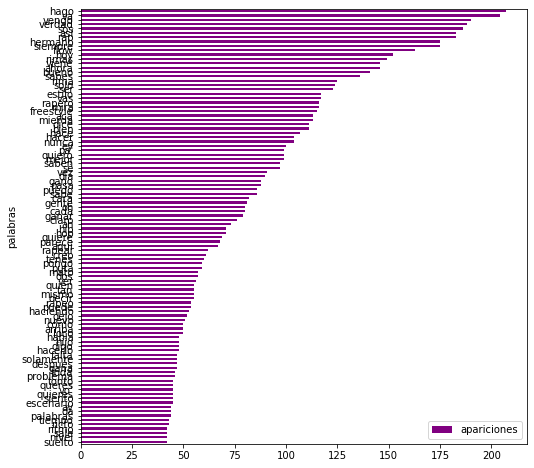

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
token_freq_df.sort_values(by='apariciones').plot.barh(x='palabras',
                      y='apariciones',
                      ax=ax,
                      color="purple")

plt.show()

In [31]:
print(len(counter.items()))

unique_tokens = [key for key, value in counter.items() if value <= 3]

print(len(unique_tokens))

print(unique_tokens[:50])

8735
6902
['muerdo', 'león', 'creación', 'relación', 'azar', 'quebró', 'intestino', 'determino', 'dominó', 'póquer', 'estructurar', 'perdurar', 'cordura', 'excusa', 'ruleta', 'rusa', 'aliño', 'niños', 'equivoquen', 'mutis', 'semen', 'cutis', 'acaparo', 'comparo', 'aro', 'call', 'of', 'duty', 'tembladeras', 'cantando', 'guantanamera', 'subes', 'suspira', 'transpira', 'elimina', 'telonero', 'dudo', 'trayendo', 'crudo', 'indulto', 'adulto', 'ludo', 'mudo', 'payaya', 'honesto', 'violé', 'kimi', 'polaroyd', 'detroit', 'cowboy']


Análisis por sílaba

In [19]:

tokenized_by_s = tokenize('S', corpus, None)

counter_s = collections.Counter(tokenized_by_s)
token_freq_s = collections.Counter({key: value for key, value in counter_s.items()})

token_freq_s_df = pd.DataFrame(token_freq_s.most_common(27), columns=['palabras', 'apariciones'])

token_freq_s_df.head()

,palabras,apariciones
0,\,69619
1,\n,10779
2,",",4644
3,que,4225
4,te,4126


In [22]:
print(len(counter_s.items()))

unique_tokens_s = [key for key, value in counter_s.items() if value <= 3]

print(len(unique_tokens_s))

print(unique_tokens_s[:50])

1911
882
['quer', 'rdu', 'of', 'dul', 'yd', 'troit', 'cow', 'boy', 'cuar', 'quim', 'séis', 'rlie', 'wn', 'sno', 'py', 'riai', 'ky', 'spe', 'dy', 'gon', 'gár', 'llue', 'zon', 'liá', '12', 'suc', 'l', 'mís', 'dun', 'kin', 'tric', 'nios', 'lios', 'nion', 'grie', 'rioh', 'az', 'ciai', 'frá', 'kai', 'már', 'mol', 'ár', 'cám', 'mul', 'vó', 'gió', 'pic', 'riol', 'troz']


Análisis usando BPE

In [20]:
import glob
from tokenizers import Tokenizer, Encoding
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Metaspace
from tokenizers.processors import TemplateProcessing

VS = 10000

tokenizer = Tokenizer(BPE(unk_token='[UNK]'))
tokenizer.pre_tokenizer = Metaspace()

files = glob.glob(dataset_path + '/**/*.txt', recursive=True)

trainer = BpeTrainer(vocab_size=VS, special_tokens=['[UNK]', '[SEP]'])
tokenizer.train(files, trainer)

tokenizer.post_processor = TemplateProcessing(
    single="$0 [SEP]",
    special_tokens=[("[SEP]", tokenizer.token_to_id("[SEP]"))],
)

tokenizer.save(dataset_path + "tokenizer-bpe-" + str(VS) + ".json")

vocab = tokenizer.get_vocab()

print(tokenizer.get_vocab_size())

10000


In [21]:
encoders = tokenizer.encode_batch(list(filter(lambda line: line, corpus.split('\n'))))
encoder = Encoding.merge(encoders)

tokenized_bpe = encoder.tokens

print(tokenized_bpe[:50])

counter_bpe = collections.Counter(tokenized_bpe)

token_freq_bpe_df = pd.DataFrame(counter_bpe.most_common(60), columns=['tokens', 'apariciones'])

token_freq_bpe_df.head()

['▁en', '▁la', '▁improvisa', 'ción', '[SEP]', '▁lamentablemente', '▁yo', '▁muer', 'do', '▁como', '▁le', 'ón', '[SEP]', '▁yo', '▁te', '▁prendo', '▁fuego,', '▁el', '▁concepto', '▁es', '▁juego', '[SEP]', '▁y', '▁contra', '▁mí', '▁es', '▁como', '▁un', '▁parque', '▁de', '▁diver', 'sión', '[SEP]', '▁te', '▁falta', '▁aprender', '▁que', '▁tengo', '▁crea', 'ción', '[SEP]', '▁y', '▁que', '▁cuando', '▁yo', '▁canto', '▁le', '▁pongo', '▁la', '▁rela']


,tokens,apariciones
0,[SEP],70772
1,▁que,21383
2,▁no,13871
3,▁la,13261
4,▁el,12373


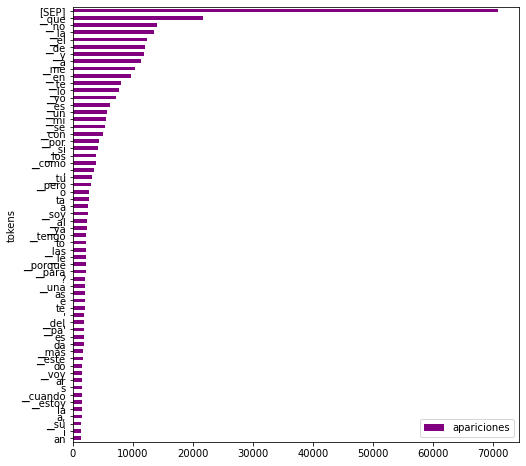

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
token_freq_bpe_df.sort_values(by='apariciones').plot.barh(x='tokens',
                      y='apariciones',
                      ax=ax,
                      color="purple")

plt.show()

In [7]:
print(len(counter_bpe.items()))

unique_tokens_bpe = [key for key, value in counter_bpe.items() if value <= 10]

print(len(unique_tokens_bpe))

print(unique_tokens_bpe[:50])

4225
146
['▁imper', 'bién', '▁freestyl', '▁terr', '▁dien', 'cci', '▁broth', '▁incl', '▁perf', '▁mú', 'nic', '▁instr', '▁micrófon', '▁bizar', '▁interna', '▁téc', 'vien', '▁inte', 'ruga', '▁ú', '▁zig', '▁pers', '▁liber', '▁cump', '¡', '▁regga', '▁obvi', '▁dij', '▁norm', '▁rit', '▁empi', '▁salam', 'ísi', '▁tampo', '▁dor', 'portun', 'uestro', '▁púr', '▁corr', 'uvi', 'cus', '▁medioc', '▁eu', 'ápi', 'diente', 'vio', '▁fav', '▁pú', '▁¿d', '▁il']
